In [1]:
# tensorflow, tf.keras 임포트
import tensorflow as tf
from tensorflow import keras

# helper 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

## 데이터 탐색

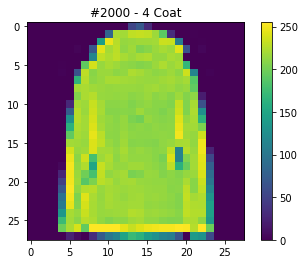

In [6]:
plt.figure()
idx_to_draw = 2000
plt.imshow(train_images[idx_to_draw])

lbl = train_labels[idx_to_draw]

plt.title('#{} - {} {}'.format(idx_to_draw, lbl, class_names[lbl]))
plt.colorbar()
plt.grid(False)
plt.show()

## Data 전처리 

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

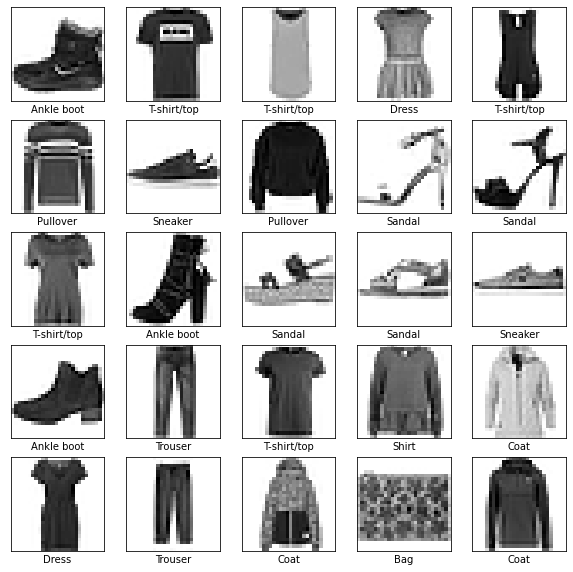

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

##  모델 구성

### 층 설정

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### 모델 컴파일

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 모델 훈련 

In [11]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 405us/step - loss: 0.4974 - accuracy: 0.8244
Epoch 2/5
1875/1875 [==============================] - 1s 407us/step - loss: 0.3743 - accuracy: 0.8652
Epoch 3/5
1875/1875 [==============================] - 1s 408us/step - loss: 0.3327 - accuracy: 0.8785
Epoch 4/5
1875/1875 [==============================] - 1s 410us/step - loss: 0.3124 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 1s 409us/step - loss: 0.2939 - accuracy: 0.8915


### 정확도 평가 

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3503 - accuracy: 0.8749

테스트 정확도: 0.8748999834060669


### 예측 만들기 

In [13]:
predictions = model.predict(test_images)

In [14]:
predictions[0]

array([1.8023475e-05, 6.9821276e-08, 8.5078062e-07, 6.2450489e-08,
       1.3935373e-06, 2.5635355e-03, 5.5406590e-06, 1.0547107e-01,
       4.7438545e-05, 8.9189208e-01], dtype=float32)

In [15]:
np.argmax(predictions[0])

9

In [16]:
test_labels[0]

9

In [17]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

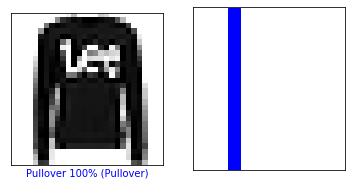

In [19]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

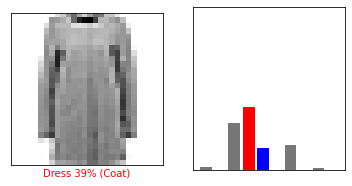

In [21]:
i = 150
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

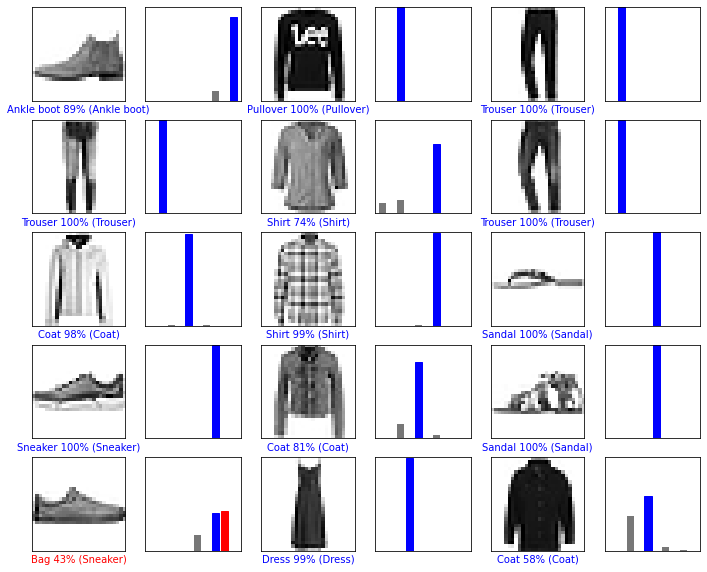

In [23]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력
# 올바른 예측은 파랑색, 잘못된 예측은 빨강색
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [33]:
# 테스트 세트에서 이미지 하나 선택
img = test_images[1]

print(img.shape)

(28, 28)


In [34]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [35]:
predictions_single = model.predict(img)

print(predictions_single)

[[7.3526688e-05 5.1769465e-12 9.9692935e-01 1.1056293e-09 7.0775941e-04
  7.7093409e-10 2.2893648e-03 3.4266931e-14 4.3098107e-09 2.7161875e-14]]


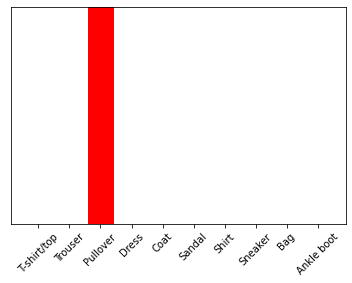

In [36]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [37]:
np.argmax(predictions_single[0])

2